<a href="https://colab.research.google.com/github/ashrafabuareesh/Prediction-_of-Product-Sales/blob/main/Copy_of_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
* Auther:Ashraf Abu Areesh



## Project Overview

### sales prediction for food items sold at various stores.
* The goal of this is to help the retailer understand the properties of products
* outlets that play crucial roles in increasing sales.

##   **Load** and **Inspect** Data

In [3]:
from google.colab import drive
drive.mount('/content/drive1')
import pandas as pd
import numpy as np


Mounted at /content/drive1


In [4]:
# Save the filepath and load the data as "df_predictions"
fpath= "/content/drive1/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_predictions= pd.read_csv(fpath)
df_predictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
# Display the first 5 rows
df_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_predictions.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
#rname columns
col_name = {"Item_Identifier":"Product ID",
            "Item_MRP":"Item_price",
            "Outlet_Identifier":"Store ID",
            "Outlet_Establishment_Year":"Store_build",
            "Outlet_Type":"Store_Type",
            "Outlet_Location_Type	":"Store_loc",
            "Outlet_Size":"Store_size"

}
df_predictions=df_predictions.rename(col_name,axis=1)
df_predictions

,Product ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_price,Store ID,Store_build,Store_size,Outlet_Location_Type,Store_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product ID            8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_price            8523 non-null   float64
 6   Store ID              8523 non-null   object 
 7   Store_build           8523 non-null   int64  
 8   Store_size            6113 non-null   object 
 9   Outlet_Location_Type  8523 non-null   object 
 10  Store_Type            8523 non-null   object 
 11  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean** Data

**Q: A1) How many rows are there?**
- Your Answer:
  - `8523`

**Q: A2) How many columns are there?**
- Your Answer:
  - `12`
  
**Q: A3)How many numeric columns?**
- Your Answer:
  - `5`

**Q: A4) How many categorical/string columns are there (dtype='object')?**
- Your Answer:
  - `7`

In [9]:
#Duplicate Rows
df_predictions.duplicated().sum()

0

In [10]:
df_predictions.nunique()
df_predictions.nunique()/len(df_predictions)*100

Product ID              18.291681
Item_Weight              4.869178
Item_Fat_Content         0.058665
Item_Visibility         92.455708
Item_Type                0.187727
Item_price              69.670304
Store ID                 0.117330
Store_build              0.105597
Store_size               0.035199
Outlet_Location_Type     0.035199
Store_Type               0.046932
Item_Outlet_Sales       40.983222
dtype: float64

<Axes: >

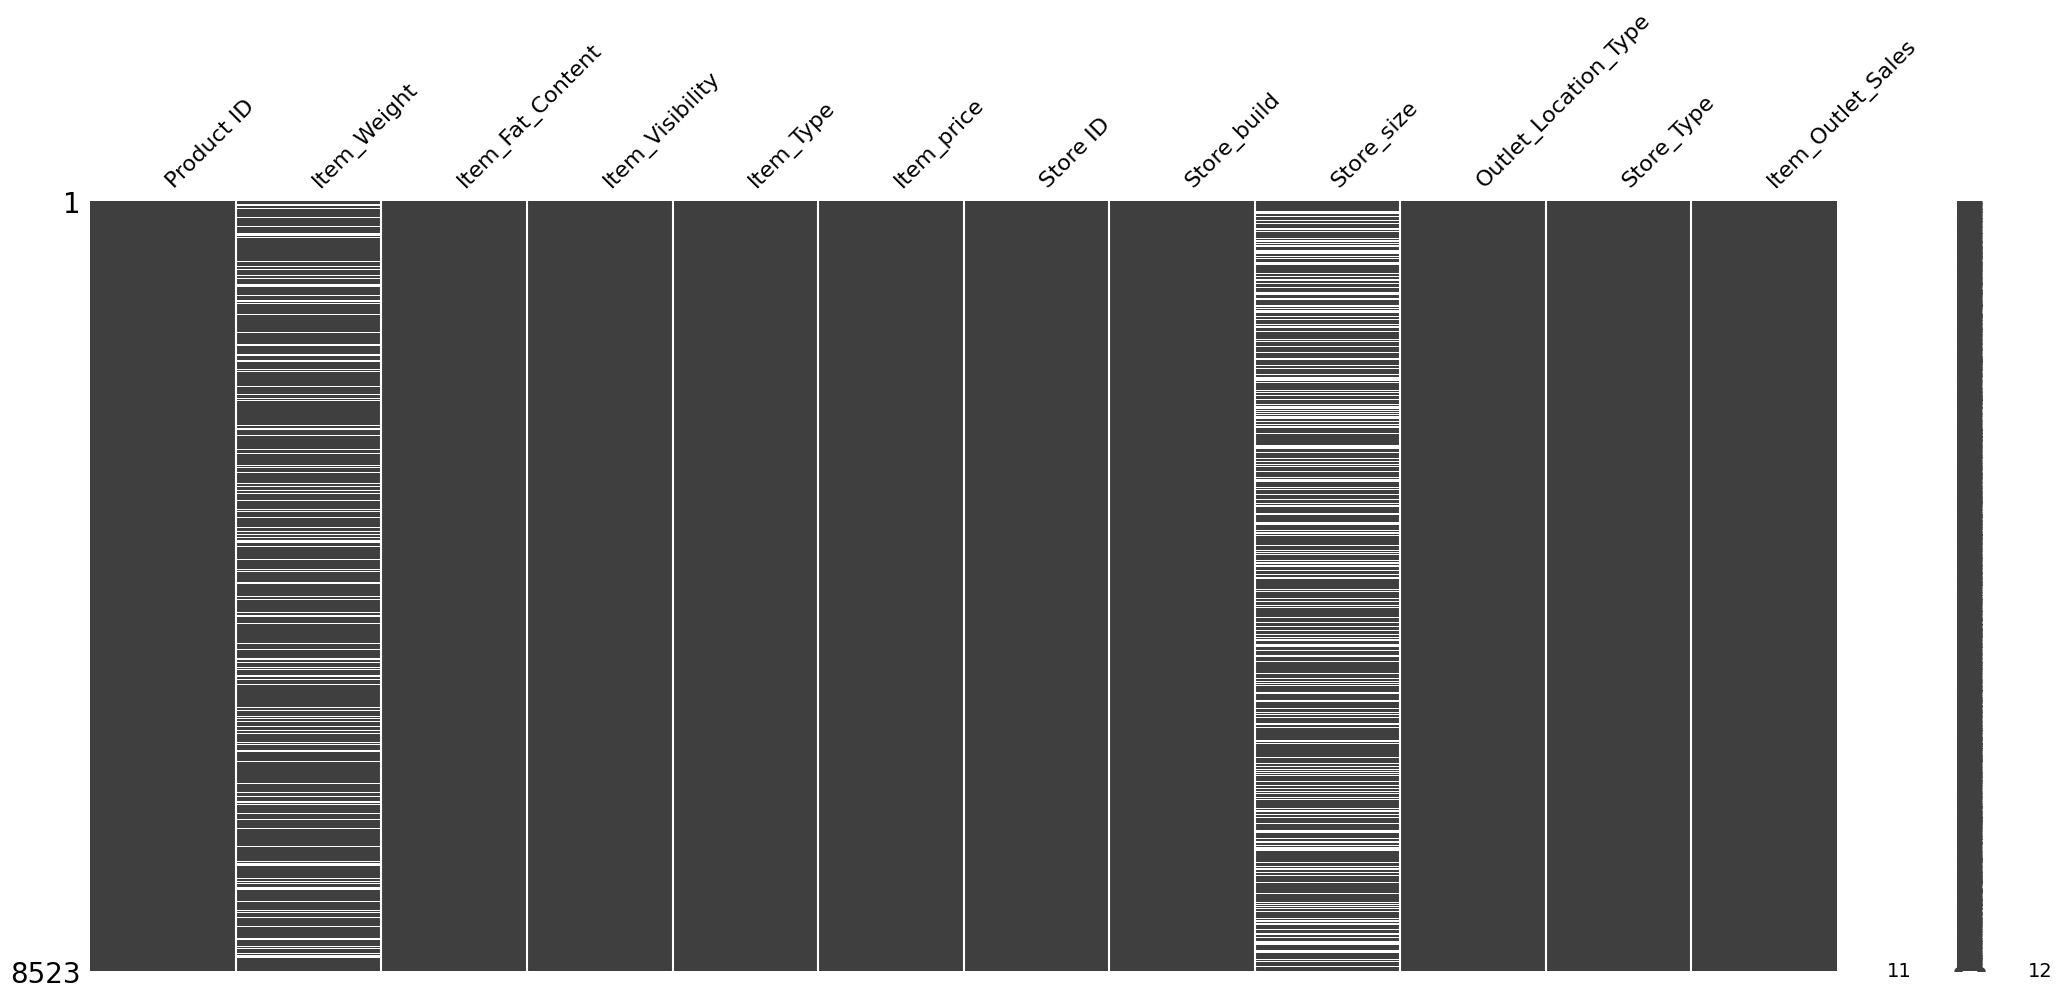

In [11]:
#  nulls using using missingno
import  missingno as msno
msno.matrix(df_predictions)

In [12]:
#categorical/string columns

col_object=df_predictions.select_dtypes("object").columns
col_object

Index(['Product ID', 'Item_Fat_Content', 'Item_Type', 'Store ID', 'Store_size',
       'Outlet_Location_Type', 'Store_Type'],
      dtype='object')

In [13]:
df_predictions[col_object].isna().sum()    #Store_size  >>2410 value null

Product ID                 0
Item_Fat_Content           0
Item_Type                  0
Store ID                   0
Store_size              2410
Outlet_Location_Type       0
Store_Type                 0
dtype: int64

In [14]:
df_predictions['Store_size'].value_counts()
df_predictions['Store_size']=df_predictions['Store_size'].fillna("missing")
df_predictions['Store_size'].value_counts()


Medium     2793
missing    2410
Small      2388
High        932
Name: Store_size, dtype: int64

In [15]:
df_predictions[col_object].isna().sum()

Product ID              0
Item_Fat_Content        0
Item_Type               0
Store ID                0
Store_size              0
Outlet_Location_Type    0
Store_Type              0
dtype: int64

In [16]:
#Checking & Fixing Consistency
for col in col_object:
  print(f"name of columns {col}")
  print(f'value count {df_predictions[col].value_counts()}')
  print('\n')

name of columns Product ID
value count FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Product ID, Length: 1559, dtype: int64


name of columns Item_Fat_Content
value count Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


name of columns Item_Type
value count Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


name of columns Store ID
value count OUT027    935
OUT013    932
OUT

In [17]:
df_predictions['Item_Fat_Content']=df_predictions['Item_Fat_Content'].replace({'reg':"Regular" , "LF":"Low Fat","low fat":"Low Fat"})
df_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
#numeric columns
col_num= df_predictions.select_dtypes("number").columns
col_num

Index(['Item_Weight', 'Item_Visibility', 'Item_price', 'Store_build',
       'Item_Outlet_Sales'],
      dtype='object')

In [19]:
df_predictions[col_num].isna().sum()   #Item_Weight>>1463

Item_Weight          1463
Item_Visibility         0
Item_price              0
Store_build             0
Item_Outlet_Sales       0
dtype: int64

In [20]:
df_predictions['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [21]:
df_predictions['Item_Weight']=df_predictions['Item_Weight'].fillna(1)
df_predictions['Item_Weight'].describe()

count    8523.000000
mean       10.822243
std         6.152616
min         1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [22]:
df_predictions.isna().sum()

Product ID              0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_price              0
Store ID                0
Store_build             0
Store_size              0
Outlet_Location_Type    0
Store_Type              0
Item_Outlet_Sales       0
dtype: int64

<Axes: >

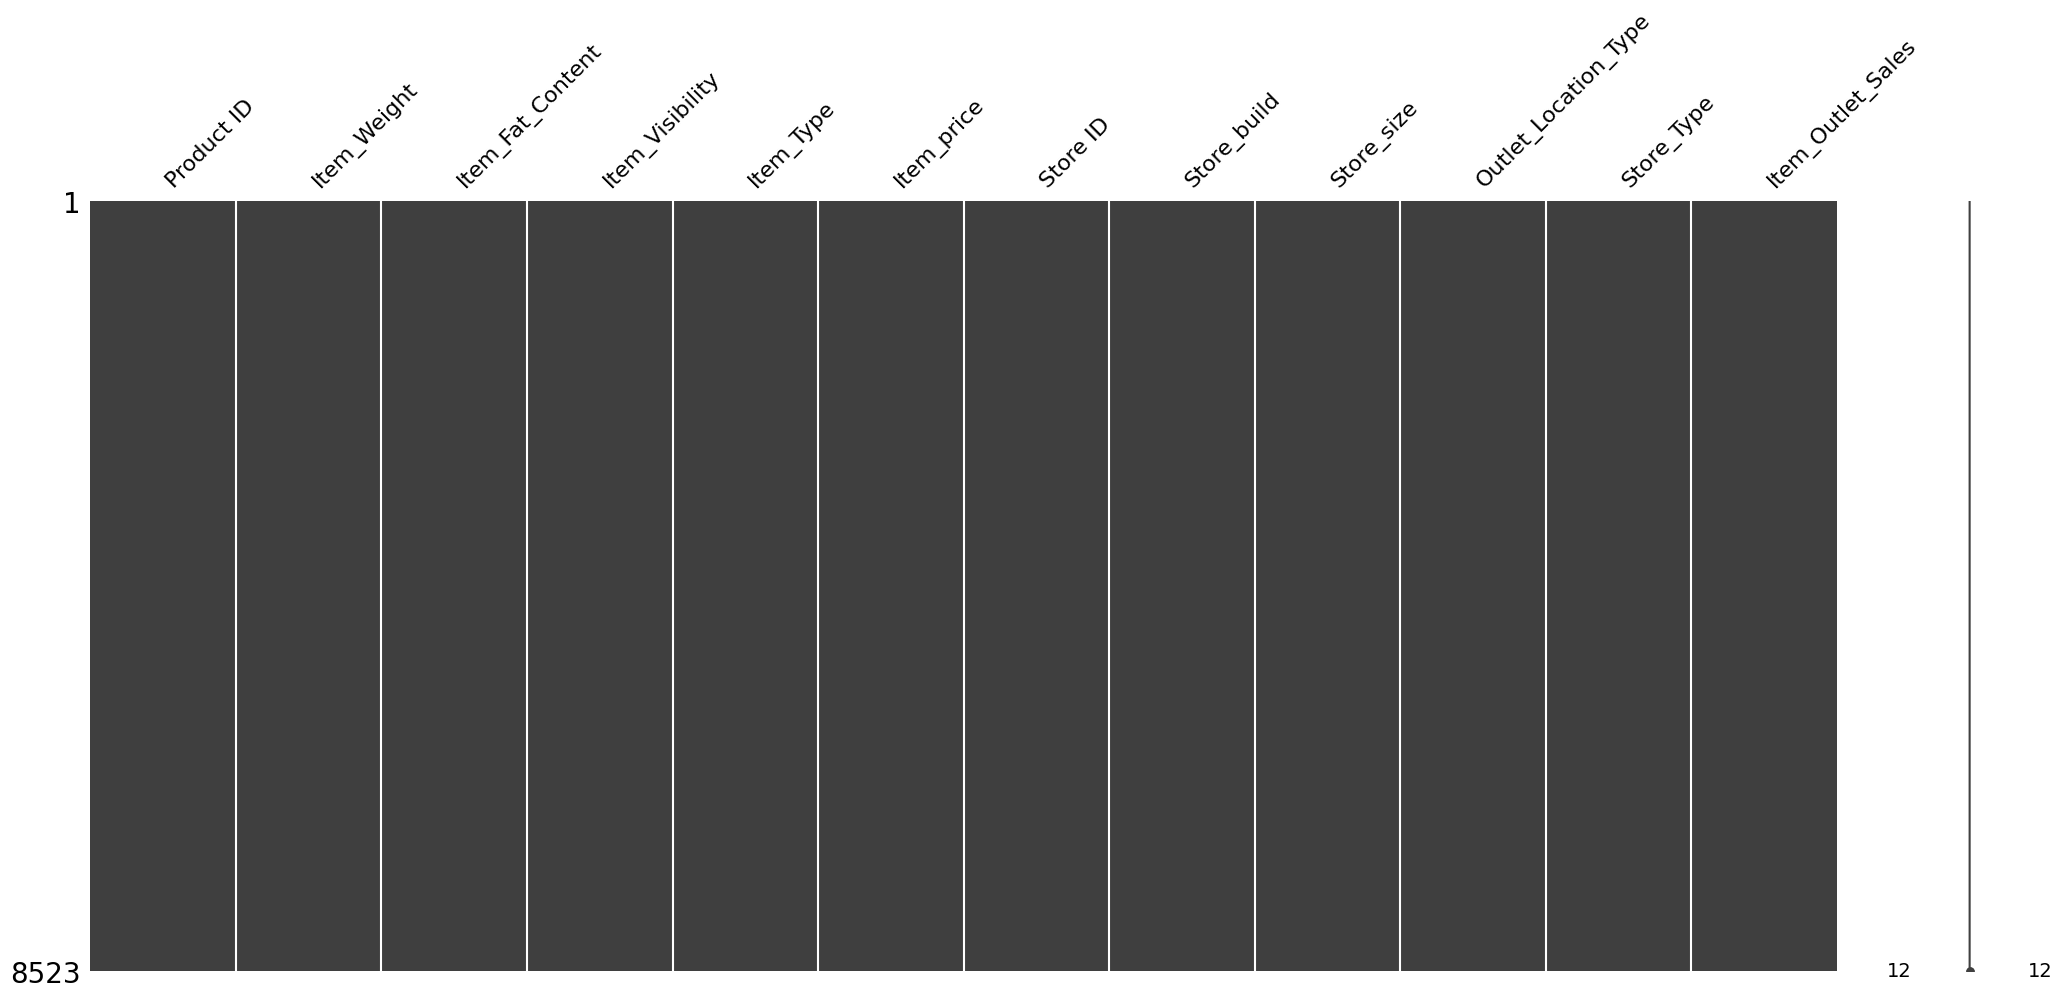

In [23]:
# Confirm no more nulls using using missingno
import  missingno as msno
msno.matrix(df_predictions)


In [27]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
for col in col_num:
  print(f'the mean value {df_predictions[col] .mean() }')
  print(f'the maximum value {df_predictions[col].max() }')
  print(f'the minimum value {df_predictions[col] .min()}')
  print('\n')


the mean value 10.82224275489851
the maximum value 21.35
the minimum value 1.0


the mean value 0.06613202877895108
the maximum value 0.328390948
the minimum value 0.0


the mean value 140.9927819781767
the maximum value 266.8884
the minimum value 31.29


the mean value 1997.8318667135984
the maximum value 2009
the minimum value 1985


the mean value 2181.288913575032
the maximum value 13086.9648
the minimum value 33.29




In [28]:
fpath_out="/content/drive1/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023_clean2.csv"
df_predictions.to_csv(fpath_out,index=True)

## **Exploratory** Data Analysis

## Feature **Inspection**